<a href="https://colab.research.google.com/github/lucialiceri/7506R-2C2022-GRUPO17/blob/main/7506R_TP1_GRUPO17_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio

In [ ]:
# Bibliotecas para obtener el dataset automaticamente de google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Bibliotecas para manejo de datos
import pandas as pd
import numpy as np
!pip install pyclustertend
from pyclustertend import hopkins

# Bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
!pip install 'dtreeviz'
from dtreeviz.trees import dtreeviz
!pip install 'geopandas'
import geopandas

# Otras bibliotecas
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 897 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=85f11ed0379029c1c10e409387fab185404ef2cea73f2e00a53d851d413d185d
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.8 MB/s 
     |████████████████████████████████| 16.7 MB 57.9 MB/s 
     |████████████████████████████████| 6.3 MB 43.2 MB/s 


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI"})
downloaded.GetContentFile('properati_argentina_2021.csv')
df_propiedades_original = pd.read_csv('/content/properati_argentina_2021.csv')

In [ ]:
df_propiedades = df_propiedades_original.copy()
df_propiedades = df_propiedades[df_propiedades['place_l2'] == 'Capital Federal']
df_propiedades = df_propiedades[(df_propiedades['property_type'] == 'Casa') | (df_propiedades['property_type'] == 'PH') | (df_propiedades['property_type'] == 'Departamento')]
df_propiedades = df_propiedades[df_propiedades['property_currency'] == 'USD']
df_propiedades = df_propiedades[df_propiedades['operation'] == 'Venta']

df_propiedades[df_propiedades['place_l4'].isna() == False]
# Separar entre 80 y 20

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
410,S8iZ1eflTJtt4bejzBVktw==,2021-09-09,2021-09-10,2021-09-09,-34.576741,-58.404830,Capital Federal,Palermo,Palermo Chico,NaN,NaN,Venta,Departamento,NaN,4.0,400.0,NaN,2700000.0,USD,Departamento - Palermo Chico
411,FblpEe26U1lQkU5vRzAtmg==,2021-09-09,2021-09-09,2021-09-09,-34.576741,-58.404830,Capital Federal,Palermo,Palermo Chico,NaN,NaN,Venta,Departamento,NaN,4.0,400.0,NaN,2700000.0,USD,Departamento - Palermo Chico
412,rPpA512CxIFuv8zDO9wrAQ==,2021-09-09,2021-11-16,2021-09-09,-34.579165,-58.413458,Capital Federal,Palermo,Palermo Chico,NaN,NaN,Venta,Departamento,4.0,2.0,85.0,75.0,179999.0,USD,Departamento - Palermo Chico
417,kokKfATispfpLcsX3xs6MA==,2021-09-09,2021-11-06,2021-09-09,-34.596098,-58.425662,Capital Federal,Palermo,Palermo Soho,NaN,NaN,Venta,Departamento,2.0,1.0,35.0,33.0,85000.0,USD,Departamento 2 ambientes - Palermo
424,QAdsaBdnyi7e1RV0VBj62w==,2021-09-09,2021-10-01,2021-09-09,-34.577044,-58.434030,Capital Federal,Palermo,Palermo Viejo,NaN,NaN,Venta,Departamento,2.0,2.0,41.0,38.0,110000.0,USD,"2 Ambientes Frente Balcon, mts subte y tren"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459448,4RCRegHW5Isz8bOkr1ftfg==,2021-01-05,9999-12-31,2021-01-05,-34.585172,-58.424659,Capital Federal,Palermo,Palermo Soho,NaN,NaN,Venta,Departamento,2.0,1.0,112.0,65.0,390000.0,USD,Palermo Soho - Exclusivo 2 ambientes con TERRA...
459453,IQjIsfYNjqJEIHT7sttLEw==,2021-01-05,9999-12-31,2021-01-05,-34.579766,-58.429692,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,Venta,Departamento,1.0,NaN,43.0,37.0,119000.0,USD,Departamento - Palermo Hollywood
459454,yEqQNevYY9Pl+iIBubKlcQ==,2021-01-05,2021-03-26,2021-01-05,-34.583413,-58.433783,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,Venta,Departamento,4.0,3.0,160.0,142.0,659900.0,USD,RETASADO!! - U$S 659.900 - 4 amb - Palermo - H...
459465,a/B38f8xZnfkyffzQdn+Ng==,2021-01-05,2021-10-14,2021-01-05,NaN,NaN,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,Venta,Departamento,3.0,2.0,67.0,67.0,192000.0,USD,Nicaragua 5900 Exc depto 3 amb con coch Bño y ...


# Analisis de variable



In [ ]:
df_propiedades_original.columns.to_list()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

**ID**: variable cualitativa

**start_date, created_on, end_date**: Ordinales *

**latitud, longitud**: Cuantitativas continuas

**place_**: cualitativa

**operation**: cualitativa

**property_type**: cualitativa

**property_rooms, property_bedrooms**: cuantitativa discreta

**property_surface_total, property_surface_covered, property_price**: cuantitativa continua

**property_currency, property_title**: cualitativa

## Variables irrelevantes

**ID, property_title**: estas variables son irrelevantes porque no representan un valor analítico. Es decir, no es posible sacar conclusiones con los datos que nos brindan.

**created_on vs. start_date**: en base al siguiente análisis podemos concluir que ambas variables tienen siempre el mismo valor en este dataset.

In [ ]:
len(df_propiedades[df_propiedades['start_date'] != df_propiedades['created_on']])

0

**place_l2, property_currency, operation**: estas variables fueron filtradas previamente en el dataset, por lo que tendrán un único valor. En el caso de *place_l2* será siempre 'Capital Federal', *property_currency* será 'USD', y *operation* será 'Ventas'.

In [ ]:
variables_irrelevantes = ['id', 'created_on', 'place_l2', 'operation', 'property_currency', 'property_title']
df_propiedades.drop(columns=variables_irrelevantes, inplace=True)
df_propiedades.columns

Index(['start_date', 'end_date', 'latitud', 'longitud', 'place_l3', 'place_l4',
       'place_l5', 'place_l6', 'property_type', 'property_rooms',
       'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price'],
      dtype='object')

Por último, renombramos las columnas para que tengan nombres más representativos.

In [ ]:
df_propiedades.rename(columns={'start_date':'fecha_inicio', 'end_date':'fecha_fin',
                               'place_l3':'barrio', 'place_l4':'sub-barrio',
                               'property_type':'tipo', 'property_rooms':'ambientes',
                               'property_bedrooms':'habitaciones', 'property_surface_total':'superficie_total',
                               'property_surface_covered':'superficie_cubierta', 'property_price':'precio'},
                      inplace=True)

## Variables cuantitativas

**Promedios**

In [ ]:
variables_cuantitativas = ['latitud', 'longitud', 'ambientes',
                           'habitaciones','superficie_total',
                           'superficie_cubierta', 'precio']
df_propiedades[variables_cuantitativas].average().to_frame().T

,latitud,longitud,ambientes,habitaciones,superficie_total,superficie_cubierta,precio
0,-34.591481,-58.449795,2.822799,2.014629,109.09297,87.931932,226238.207185


**Q1, Medianas, Q3**

In [ ]:
df_propiedades[variables_cuantitativas].quantile([0.25, 0.5, 0.75])

,latitud,longitud,ambientes,habitaciones,superficie_total,superficie_cubierta,precio
0.25,-34.615975,-58.466522,2.0,1.0,45.0,40.0,95000.0
0.50,-34.595790,-58.439000,3.0,2.0,65.0,58.0,143900.0
0.75,-34.577413,-58.408862,4.0,3.0,105.0,88.0,237000.0


**Moda**



In [ ]:
df_propiedades[variables_cuantitativas].mode()

,latitud,longitud,ambientes,habitaciones,superficie_total,superficie_cubierta,precio
0,-34.54125,-58.472966,3.0,1.0,50.0,40.0,110000.0


## Gráficos de distribuciones de variables cuantitativas

[Text(0, 0.5, 'Densidad'),
 Text(0.5, 0, 'Longitud'),
 Text(0.5, 1.0, 'Densidad variable Longitud')]

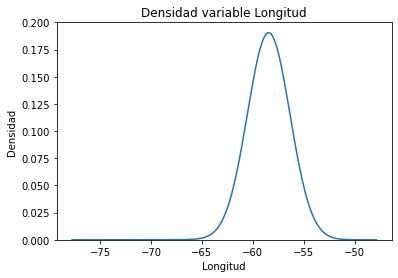

In [ ]:
#grf = df_propiedades['longitud'].plot.kde(title="Densidad variable latitud",xlabel="Latitud",ylabel="Densidad")
grf = sns.kdeplot(data=df_propiedades['longitud'], bw_adjust=70).set(title="Densidad variable Longitud",xlabel="Longitud",ylabel="Densidad")
grf

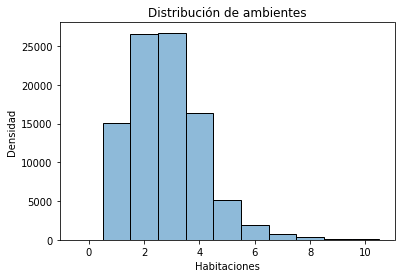

In [ ]:
grf_discr_rooms = sns.histplot(data=df_propiedades['ambientes'], alpha = 0.5, discrete=True, binrange=(0, 10)).set(title="Distribución de ambientes",xlabel="Habitaciones",ylabel="Densidad")

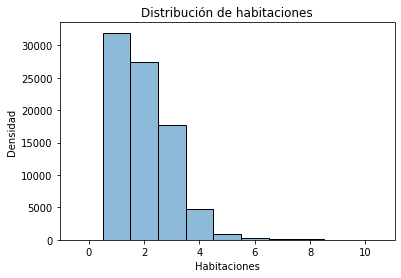

In [ ]:
grf_discr_bedrooms = sns.histplot(data=df_propiedades['habitaciones'], alpha = 0.5, discrete=True, binrange=(0, 10)).set(title="Distribución de habitaciones",xlabel="Habitaciones",ylabel="Densidad")

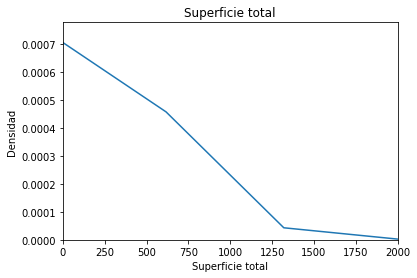

In [ ]:
grf_superficie_total = sns.kdeplot(data=df_propiedades['superficie_total'], bw_adjust=5).set(title="Superficie total",xlabel="Superficie total",ylabel="Densidad", xlim=(0, 2000))

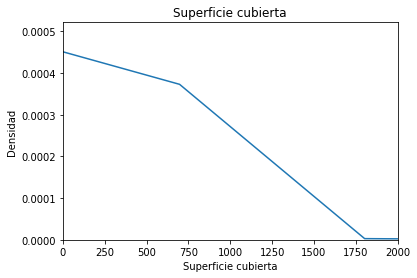

In [ ]:
# property_surface_covered, property_price
grf_surface_covered = sns.kdeplot(data=df_propiedades['superficie_cubierta'], bw_adjust=5).set(title="Superficie cubierta",xlabel="Superficie cubierta",ylabel="Densidad", xlim=(0, 2000))

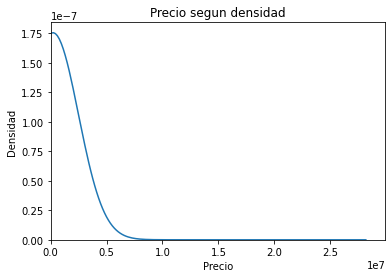

In [ ]:
grf_property_price = sns.kdeplot(data=df_propiedades['precio'], bw_adjust=70).set(title="Precio segun densidad",xlabel="Precio",ylabel="Densidad", xlim=(0))


# Correlaciones entre variables


In [ ]:
matriz_corr=df_propiedades.corr()
matriz_corr

,latitud,longitud,place_l6,ambientes,habitaciones,superficie_total,superficie_cubierta,precio
latitud,1.000000,-0.239235,NaN,0.005521,0.003162,0.025348,0.002352,0.016635
longitud,-0.239235,1.000000,NaN,-0.008324,-0.008556,-0.015056,-0.001155,0.023314
place_l6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ambientes,0.005521,-0.008324,NaN,1.000000,0.871940,0.067211,0.076097,0.488934
habitaciones,0.003162,-0.008556,NaN,0.871940,1.000000,0.067702,0.075075,0.425386
superficie_total,0.025348,-0.015056,NaN,0.067211,0.067702,1.000000,0.604311,0.085235
superficie_cubierta,0.002352,-0.001155,NaN,0.076097,0.075075,0.604311,1.000000,0.056238
precio,0.016635,0.023314,NaN,0.488934,0.425386,0.085235,0.056238,1.000000


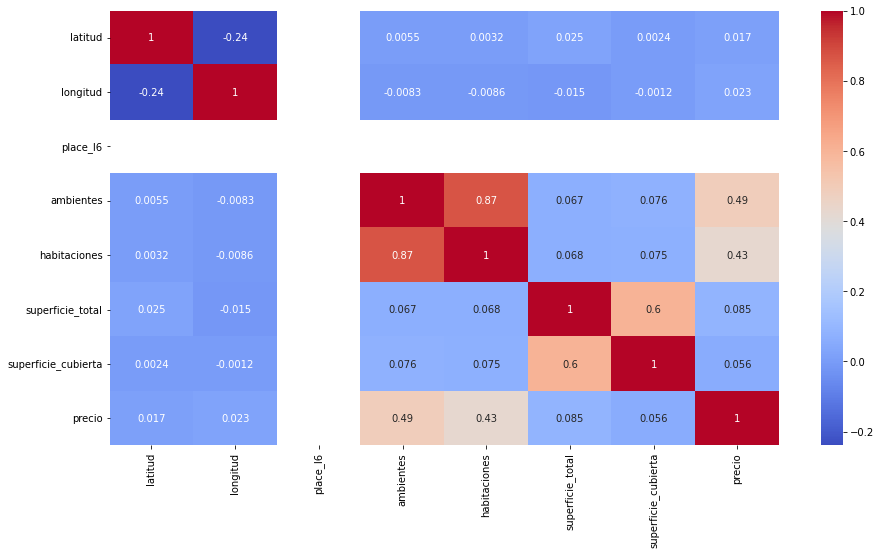

In [ ]:
plt.figure(figsize = (15,8))
sns.heatmap(matriz_corr, annot = True, cmap='coolwarm')

In [ ]:
#sns.pairplot(df_propiedades)

# Datos Faltantes

In [ ]:
porcentajes_na = round(df_propiedades.isna().sum() * 100 / len(df_propiedades), 2)
porcentajes_na

fecha_inicio             0.00
fecha_fin                0.00
latitud                  3.96
longitud                 3.96
barrio                   0.44
sub-barrio              96.13
place_l5               100.00
place_l6               100.00
tipo                     0.00
ambientes                1.11
habitaciones            11.66
superficie_total         5.14
superficie_cubierta      3.56
precio                   0.00
dtype: float64

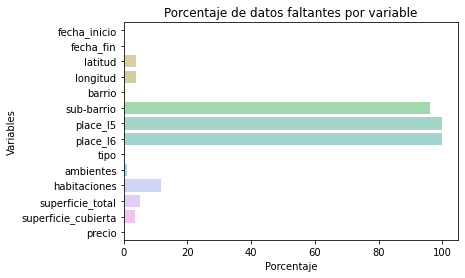

In [ ]:
eje_y = porcentajes_na.index.tolist()
eje_x = porcentajes_na.tolist()

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y ,alpha=0.5, orient="h").set(title="Porcentaje de datos faltantes por variable",xlabel='Porcentaje',ylabel='Variables')

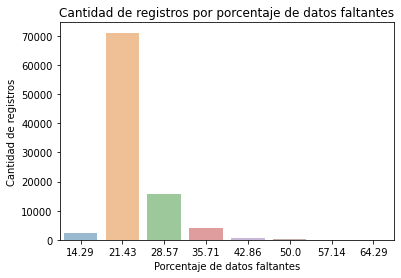

In [ ]:
datos_faltantes_por_fila = (round(df_propiedades.isna().sum(axis=1) * 100 / len(df_propiedades.columns), 2)).value_counts()
datos_faltantes_por_fila
eje_x = datos_faltantes_por_fila.index.tolist()
eje_y = datos_faltantes_por_fila.tolist()

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y ,alpha=0.5).set(title="Cantidad de registros por porcentaje de datos faltantes",xlabel='Porcentaje de datos faltantes',ylabel='Cantidad de registros')

# Imputación

In [ ]:
df_propiedades_imputado = df_propiedades.copy()

 ## Ambientes y habitaciones

Viendo que la cantidad de registros sin valor para la variable 'habitaciones' es no despreciable, y habiendo observado que la correlatividad entre ambientes y habitaciones es alta (0.87), podemos imputar los datos faltantes de habitaciones basandonos en los de ambientes.

In [ ]:
cantidad_valores_na_habitaciones = df_propiedades.habitaciones.isna().sum()
porcentaje_habitaciones_faltante = cantidad_valores_na_habitaciones * 100 / len(df_propiedades)
print(f'Porcentaje de datos faltantes para habitaciones: {round(porcentaje_habitaciones_faltante, 2)}')
print(f'Cantidad de valores faltantes para habitaciones: {cantidad_valores_na_habitaciones}')

Porcentaje de datos faltantes para habitaciones: 11.66
Cantidad de valores faltantes para habitaciones: 10987


Realizamos una imputación del tipo Hot Deck. Completamos los datos faltantes utilizando la moda dada entre propiedades de igual cantidad de ambientes. 

In [ ]:
# Obtengo los valores que toma la variable 'ambientes', sin tener en cuenta los cuales tienen el valor 'habitaciones' como valor faltante.
cantidad_de_ambientes = df_propiedades.loc[df_propiedades['habitaciones'].notna(), 'ambientes'].value_counts().index
# Itero y para cada valor obtengo la moda de habitaciones (el valor de habitaciones más frecuente) de todas las filas con i cantidad de ambientes
for i in cantidad_de_ambientes:
  moda = df_propiedades_imputado[(df_propiedades_imputado['ambientes'] == i)]['habitaciones'].mode()[0]
  # Luego lleno los valores faltantes para las filas que tengan la misma cantidad de ambientes
  df_propiedades_imputado.loc[(df_propiedades_imputado['ambientes'] == i) & (df_propiedades_imputado['habitaciones'].isna()), 'habitaciones'] = moda


cantidad_valores_na_habitaciones = df_propiedades_imputado.habitaciones.isna().sum()
print(f'Cantidad de valores faltantes para habitaciones: {cantidad_valores_na_habitaciones}')

Cantidad de valores faltantes para habitaciones: 433


Vemos que todavía no hay cero valores faltantes para la feature habitaciones, pero esto es porque en estos registros, la cantidad de ambientes también es un valor faltante, por lo que no se puede realizar el hot deck.

In [ ]:
cant_reg_con_ambientes_habitaciones_na = len(df_propiedades_imputado[df_propiedades_imputado['habitaciones'].isna() & df_propiedades_imputado['ambientes'].isna()])
print(f'Cantidad de registros con cant. de ambientes y habitaciones faltantes: {cant_reg_con_ambientes_habitaciones_na}')

Cantidad de registros con cant. de ambientes y habitaciones faltantes: 432


Estos registros con ambos valores faltantes pueden ser eliminados, ya que no poseen suficiente información para que podamos extraer conclusiones de ellos, y no hay otras columnas con suficiente correlatividad para poder imputar estos datos de una forma precisa.

In [ ]:
df_propiedades_imputado = df_propiedades_imputado[(df_propiedades_imputado['habitaciones'].notna()) & (df_propiedades_imputado['ambientes'].notna())]
print(f'Cantidad de datos faltantes en ambientes: {df_propiedades_imputado.ambientes.isna().sum()}')
print(f'Cantidad de datos faltantes en habitaciones: {df_propiedades_imputado.habitaciones.isna().sum()}')

Cantidad de datos faltantes en ambientes: 0
Cantidad de datos faltantes en habitaciones: 0


Podemos ver en los siguientes gráficos que la distribución no cambia significativamente al realizar este tipo de imputación.

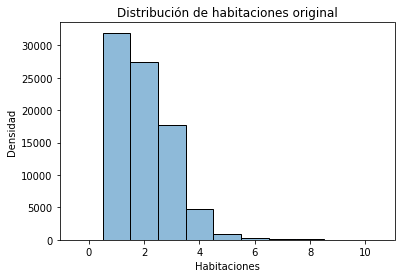

In [ ]:
grf_discr_ambientes = sns.histplot(data=df_propiedades['habitaciones'], alpha = 0.5, discrete=True, binrange=(0, 10)).set(title="Distribución de habitaciones original",xlabel="Habitaciones",ylabel="Densidad")

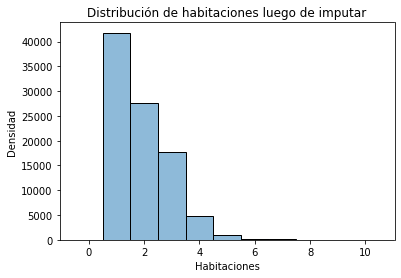

In [ ]:
grf_discr_ambientes_imp = sns.histplot(data=df_propiedades_imputado['habitaciones'], alpha = 0.5, discrete=True, binrange=(0, 10)).set(title="Distribución de habitaciones luego de imputar",xlabel="Habitaciones",ylabel="Densidad")

 ## Latitud, longitud y barrio

 En el caso en que haya información sobre la latitud y longitud, pero no del barrio, podremos realizar una imputación de tipo 'cold deck' para rellenar basándonos en otro dataset con la información correspondiente. Pero, en caso de no tener otro dataset podremos imputar los datos utilizando el algoritmo 'K-vecinos más cercanos' (a implementar). Antes de ello tendremos que deshacernos de los registros que no contengan datos de barrios, y tampoco de latitud y longitud.

In [ ]:
cantidad_na_lon_lat_barrio = (df_propiedades_imputado[['latitud', 'longitud', 'barrio']].isna().sum(axis=1) == 3)
df_propiedades_imputado.drop(df_propiedades_imputado[cantidad_na_lon_lat_barrio].index, inplace=True)
cantidad_na_lon_lat_barrio = (df_propiedades_imputado[['latitud', 'longitud', 'barrio']].isna().sum(axis=1) == 3).sum()
print(f'Cantidad de filas sin ninguno de los tres valores: {cantidad_na_lon_lat_barrio}')

Cantidad de filas sin ninguno de los tres valores: 0


In [ ]:
cant_filas_con_lon_lat_sin_barrio = (df_propiedades_imputado[['latitud', 'longitud']].notna().sum(axis=1) == 2 & df_propiedades_imputado['barrio'].isna()).sum()
print(f'Cantidad de filas con latitud y longitud pero sin barrio: {cant_filas_con_lon_lat_sin_barrio}')

Cantidad de filas con latitud y longitud pero sin barrio: 3467


Ahora podemos usar K-vecinos más cercanos para imputar aquellas filas donde se tenga la informacion de latitud y longitud pero no la de barrio:

In [ ]:
df_propiedades_imputado['barrio'].value_counts()

Palermo                 14157
Belgrano                 8816
Caballito                7114
Recoleta                 6213
Villa Urquiza            4632
Almagro                  4061
Nuñez                    3525
Villa Crespo             3164
Flores                   3081
Barrio Norte             2934
Balvanera                2538
Colegiales               1930
Villa Devoto             1904
Villa del Parque         1811
Saavedra                 1804
Puerto Madero            1477
San Telmo                1353
San Cristobal            1293
San Nicolás              1278
Retiro                   1234
Boedo                    1229
Barracas                 1220
Floresta                 1177
Monserrat                1104
Parque Chacabuco         1062
Villa Pueyrredón         1002
Coghlan                   936
Villa Luro                718
Mataderos                 713
Chacarita                 690
Liniers                   659
Villa Ortuzar             658
Parque Patricios          628
Villa Luga

In [ ]:
from sklearn.impute import KNNImputer

# Todavía no funciona

# columnas = ['latitud', 'longitud', 'barrio']
# df_propiedades_imputado_knn = df_propiedades_imputado[columnas].copy()
# barrio_dummies = pd.get_dummies(df_propiedades_imputado['barrio'], drop_first=True)
# df_propiedades_imputado_knn.drop('barrio', axis='columns', inplace=True)
# df_propiedades_imputado_knn = pd.concat([df_propiedades_imputado_knn, barrio_dummies], axis='columns')
# imputer = KNNImputer(n_neighbors=5, weights='distance')
# df_propiedades_imputado_knn.isna().sum()
# df_propiedades_imputado_knn = imputer.fit_transform(df_propiedades_imputado_knn)
# df_propiedades_imputado_knn
# df_propiedades_imputado_knn = pd.DataFrame(imputer.fit_transform(df_propiedades_imputado_knn),columns = df_propiedades_imputado_knn.columns)
# df_propiedades_imputado_knn

## Superficie total y cubierta

Las features 'superficie_total' y 'superficie_cubierta' tienen una correlatividad de 0.6, lo suficientemente alta para poder justificar una imputación entre ellas utilizando el otro dato faltante. Podemos ver la cantidad de columnas en donde al menos uno de los datos falta:

In [ ]:
cant_filas_con_total_sin_cub = ((df_propiedades_imputado['superficie_total'].notna()) & (df_propiedades_imputado['superficie_cubierta'].isna())).sum()
cant_filas_sin_total_con_cub = ((df_propiedades_imputado['superficie_total'].isna()) & (df_propiedades_imputado['superficie_cubierta'].notna())).sum()
cant_filas_sin_total_sin_cub = ((df_propiedades_imputado['superficie_total'].isna()) & (df_propiedades_imputado['superficie_cubierta'].isna())).sum()
print(f'Cantidad de registros con superficie total y sin superficie cubierta: {cant_filas_con_total_sin_cub}')
print(f'Cantidad de registros sin superficie total y con superficie cubierta: {cant_filas_sin_total_con_cub}')
print(f'Cantidad de registros sin superficie total y sin superficie cubierta: {cant_filas_sin_total_sin_cub}')

Cantidad de registros con superficie total y sin superficie cubierta: 3258
Cantidad de registros sin superficie total y con superficie cubierta: 4567
Cantidad de registros sin superficie total y sin superficie cubierta: 0


Para completar estos datos usaremos una imputación de tipo MICE. Es decir, realizaremos regresión lineal sobre los datos faltantes para poder rellenarlos basándonos en el dato que sí tenemos. De esta manera podremos completar todos los datos de superficies.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

columnas=['superficie_total','superficie_cubierta']
df_eliminar_nans=df_propiedades_imputado[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0)
df_propiedades_imputado.loc[:, columnas] = imp.fit_transform(df_eliminar_nans)

Al realizar esta imputación podemos ver que ya no hay datos faltantes para las superficies.

In [ ]:
cant_filas_con_total_sin_cub = ((df_propiedades_imputado['superficie_total'].notna()) & (df_propiedades_imputado['superficie_cubierta'].isna())).sum()
cant_filas_sin_total_con_cub = ((df_propiedades_imputado['superficie_total'].isna()) & (df_propiedades_imputado['superficie_cubierta'].notna())).sum()
cant_filas_sin_total_sin_cub = ((df_propiedades_imputado['superficie_total'].isna()) & (df_propiedades_imputado['superficie_cubierta'].isna())).sum()
print(f'Cantidad de registros con superficie total y sin superficie cubierta: {cant_filas_con_total_sin_cub}')
print(f'Cantidad de registros sin superficie total y con superficie cubierta: {cant_filas_sin_total_con_cub}')
print(f'Cantidad de registros sin superficie total y sin superficie cubierta: {cant_filas_sin_total_sin_cub}')

Cantidad de registros con superficie total y sin superficie cubierta: 0
Cantidad de registros sin superficie total y con superficie cubierta: 0
Cantidad de registros sin superficie total y sin superficie cubierta: 0


También se puede comparar la distribución de ambas variables antes y después de imputar.

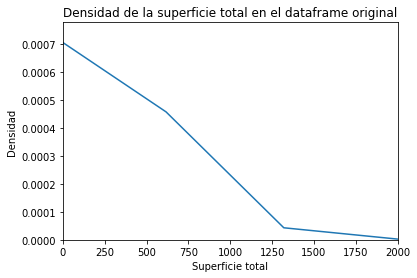

In [ ]:
grf_superficie_total = sns.kdeplot(data=df_propiedades['superficie_total'], bw_adjust=5).set(title="Densidad de la superficie total en el dataframe original",xlabel="Superficie total",ylabel="Densidad", xlim=(0, 2000))

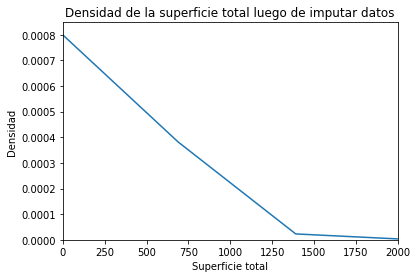

In [ ]:
grf_superficie_total = sns.kdeplot(data=df_propiedades_imputado['superficie_total'], bw_adjust=5).set(title="Densidad de la superficie total luego de imputar datos",xlabel="Superficie total",ylabel="Densidad", xlim=(0, 2000))

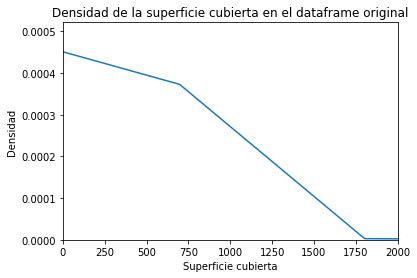

In [ ]:
grf_superficie_cubierta = sns.kdeplot(data=df_propiedades['superficie_cubierta'], bw_adjust=5).set(title="Densidad de la superficie cubierta en el dataframe original",xlabel="Superficie cubierta",ylabel="Densidad", xlim=(0, 2000))

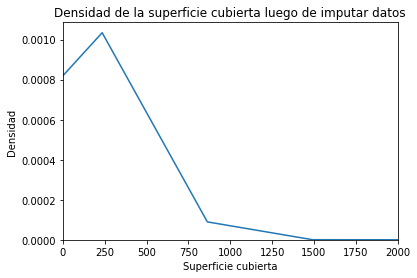

In [ ]:
grf_superficie_cubierta = sns.kdeplot(data=df_propiedades_imputado['superficie_cubierta'], bw_adjust=5).set(title="Densidad de la superficie cubierta luego de imputar datos",xlabel="Superficie cubierta",ylabel="Densidad", xlim=(0, 2000))

## sub-barrio, place_l5, y place_l6



Estas features están en su mayoría vacías. Sus datos no son lo suficientemente representantes de la población para poder considerarlos, por lo tanto decidimos eliminarlas.

In [ ]:
df_propiedades_imputado.drop(columns=['sub-barrio', 'place_l5', 'place_l6'], inplace=True)

Luego de realizar todas las imputaciones, vemos que el gráfico de imputaciones mejoró drásticamente, teniendo una cota superior de datos faltantes de menos del 4% por columna, siendo estos datos mayormente de latitud y longitud.

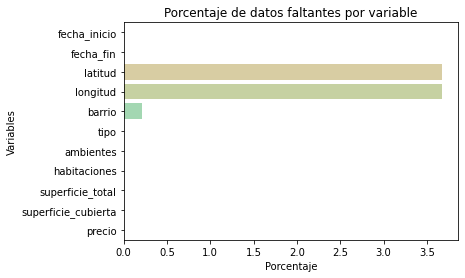

In [ ]:
porcentajes_na = round(df_propiedades_imputado.isna().sum() * 100 / len(df_propiedades), 2)
eje_y = porcentajes_na.index.tolist()
eje_x = porcentajes_na.tolist()

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y ,alpha=0.5, orient="h").set(title="Porcentaje de datos faltantes por variable",xlabel='Porcentaje',ylabel='Variables')

In [ ]:
df_propiedades = df_propiedades_imputado

# Valores atípicos

## Latitud y longitud

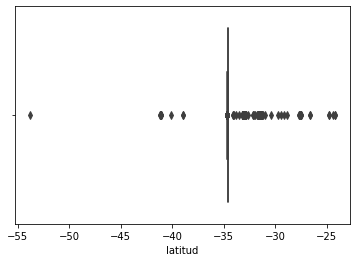

In [ ]:
grf = sns.boxplot(x=df_propiedades.latitud)

Dado que los limites de latitud de CABA se encuentran entre -34.50 y -34.70 podemos descartar del data set cualquier propiedad que se encuentre por fuera.

In [ ]:
df_propiedades_atipicos = df_propiedades[(df_propiedades['latitud'] < -34.50) & (df_propiedades['latitud'] > -34.70)]

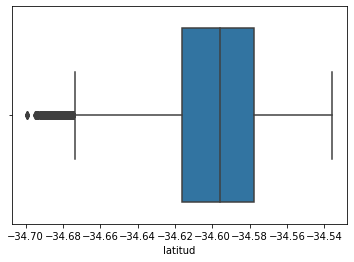

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.latitud)

Podemos realizar un análisis similar para la longitud, la cuál varía entre -58.53 y -58.35

In [ ]:
len(df_propiedades_atipicos[(df_propiedades_atipicos['longitud'] < -58.53) | (df_propiedades_atipicos['longitud'] > -58.35)])

20

Por lo que podemos observar, 20 registros están por fuera de estos límites. Podemos borrar estas propiedades, ya que probablemente sean datos mal cargados.

In [ ]:
df_propiedades_atipicos = df_propiedades_atipicos[(df_propiedades_atipicos['longitud'] > -58.53) & (df_propiedades_atipicos['longitud'] < -58.35)]

Y podemos verificar que fueron efectivamente eliminados:

In [ ]:
len(df_propiedades_atipicos[(df_propiedades_atipicos['longitud'] < -58.53) | (df_propiedades_atipicos['longitud'] > -58.35)])

0

Mostrar boxplots puede ayudar a ver la diferencia entre el dataset con estos datos erroneamente cargados y y el mismo dataset luego de eliminarlos.

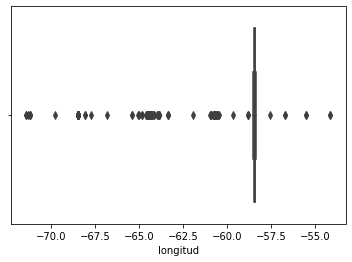

In [ ]:
grf = sns.boxplot(x=df_propiedades.longitud)

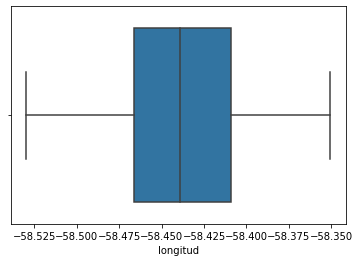

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.longitud)

## Fechas

Se puede hacer otro análisis univariado para las fechas. Debido a que este dataset fue hecho para el año 2021, las fechas de inicio que tengan otro año deben ser erróneos.

In [ ]:
df_propiedades_atipicos['año_inicio'] = df_propiedades_atipicos['fecha_inicio'].apply(lambda x: x.split('-')[0])
df_propiedades_atipicos['año_inicio'] = pd.to_numeric(df_propiedades_atipicos['año_inicio'])
df_propiedades_atipicos['año_fin'] = df_propiedades_atipicos['fecha_fin'].apply(lambda x: x.split('-')[0])
df_propiedades_atipicos['año_fin'] = pd.to_numeric(df_propiedades_atipicos['año_fin'])

In [ ]:
df_propiedades_atipicos['año_inicio'].value_counts()

2021    89434
Name: año_inicio, dtype: int64

In [ ]:
df_propiedades_atipicos['año_fin'].value_counts()

2021    58481
2022    26286
9999     4667
Name: año_fin, dtype: int64

In [ ]:
df_propiedades_atipicos.loc[df_propiedades_atipicos['fecha_fin'] > "2022-10-13", "fecha_fin"].value_counts()

9999-12-31    4667
Name: fecha_fin, dtype: int64

En este caso, 'fecha_inicio' parece no tener outliers a simple vista. Sin embargo, 'fecha_fin' si tiene, es el valor 9999. Si nos fijamos los valores de fecha_fin para ese valor de año, podemos ver que es un valor absurdo, y muy probablemente un error:

In [ ]:
df_propiedades_atipicos[df_propiedades_atipicos['año_fin'] == 9999]['fecha_fin'].value_counts()

9999-12-31    4667
Name: fecha_fin, dtype: int64

In [ ]:
porcentaje_fechas_erroneas = len(df_propiedades_atipicos[df_propiedades_atipicos['año_fin'] == 9999]) * 100 / len(df_propiedades_atipicos)
print(f'Porcentaje de fechas erroneas: {round(porcentaje_fechas_erroneas, 2)}%')

Porcentaje de fechas erroneas: 5.22%


Más de un 5% de nuestro dataset tiene como fecha '9999-12-31', por lo tanto es probable que en realidad sea un valor faltante. 

(Ya que la fecha no es una feature muy importante, podemos reemplazar estos valores con NaN para evitar que afecte futuros entrenamientos en lugar de descartarlos.)

In [ ]:
#df_propiedades_atipicos.loc[df_propiedades_atipicos['año_fin'] == 9999, 'fecha_fin'] = np.nan

In [ ]:
#porcentajes_na = round(df_propiedades_atipicos.isna().sum() * 100 / len(df_propiedades), 2)
#eje_y = porcentajes_na.index.tolist()
#eje_x = porcentajes_na.tolist()

#sns_bar_plot=sns.barplot(x=eje_x, y=eje_y ,alpha=0.5, orient="h").set(title="Porcentaje de datos faltantes por variable",xlabel='Porcentaje',ylabel='Variables')

Vemos que ahora la fecha_fin influye en el gráfico de datos faltantes, pero al no ser una feature crítica se puede aceptar un 5% de datos faltantes.

In [ ]:
df_propiedades_atipicos.drop(["año_inicio", "año_fin"], axis="columns", inplace=True)

## Superficie total y cubierta

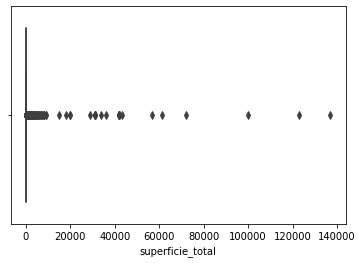

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.superficie_total)

Al igual que las otras variables analizadas, a simple vista se pueden ver varios outliers. Debido a que Capital Federal es una zona urbana, y teniendo en cuenta que sólo se consideran casas, PHs y departamentos, cualquier valor por encima de 10000 metros cuadrados (100m x 100m, una cuadra entera) debería ser observado más cercanamente, ya que es posible que sea un valor erróneo o mal cargado.

In [ ]:
df_propiedades_atipicos.loc[df_propiedades_atipicos['superficie_total'] > 10000, ['superficie_total', 'superficie_cubierta', 'tipo']]

,superficie_total,superficie_cubierta,tipo
72316,61130.0,53030.0,Departamento
72521,33800.0,31670.0,Departamento
84073,36000.0,30.0,Departamento
106598,56740.0,52540.0,Departamento
117835,43086.0,40038.0,Departamento
126869,31000.0,26.0,Departamento
129214,137000.0,135.0,Departamento
219021,72060.0,90.0,Departamento
237392,20041.0,139.0,PH
264624,14744.0,13717.0,Departamento


Podemos ver que en varios casos es claro que hubo un error de tipeo al ingresar el registro. Por ejemplo, podemos investigar el registro 353009:

In [ ]:
df_propiedades_atipicos.loc[353009, :]

fecha_inicio             2021-06-25
fecha_fin                2021-08-10
latitud                  -34.579163
longitud                 -58.455725
barrio                   Colegiales
tipo                   Departamento
ambientes                       1.0
habitaciones                    1.0
superficie_total            31000.0
superficie_cubierta            26.0
precio                      51100.0
Name: 353009, dtype: object

En este caso es claro que, al ser un departamento, no puede tener 31000m2. Lo que asumimos es un error de tipeo, cuando el valor correcto debería ser 31 metros cuadrados.
Arreglar estos campos requiere analizar los valores en los que es posible que se haya tipeado mal. En general, si superficie cubierta no supera los 500 metros cuadrados, podemos asumir que hubo un error de tipeo:

In [ ]:
df_propiedades_atipicos.loc[(df_propiedades_atipicos['superficie_total'] > 10000) & (df_propiedades_atipicos['superficie_cubierta'] < 500), ['superficie_total', 'superficie_cubierta', 'tipo']]

,superficie_total,superficie_cubierta,tipo
84073,36000.0,30.0,Departamento
126869,31000.0,26.0,Departamento
129214,137000.0,135.0,Departamento
219021,72060.0,90.0,Departamento
237392,20041.0,139.0,PH
275253,31000.0,26.0,Departamento
300394,31000.0,26.0,Departamento
304492,31000.0,26.0,Departamento
324541,20041.0,139.0,PH
353009,31000.0,26.0,Departamento


Quitando el registro 129214, el resto puede repararse diviendo el resultado por 100:

In [ ]:
df_propiedades_atipicos.loc[df_propiedades_atipicos['superficie_total'] == 137000.0, 'superficie_total'] = df_propiedades_atipicos.loc[129214, 'superficie_total'] / 10

df_propiedades_atipicos.loc[df_propiedades_atipicos['superficie_total'] > 10000, 'superficie_total'] /= 100
df_propiedades_atipicos.loc[df_propiedades_atipicos['superficie_cubierta'] > 10000, 'superficie_cubierta'] /= 100

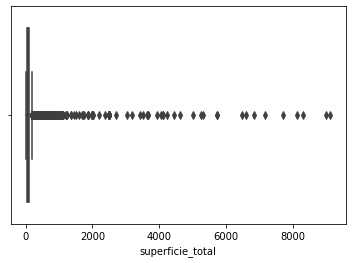

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.superficie_total)

Vemos que sigue habiendo valores atipicos. Estos valores pueden ser descartados immediatamente si superan los 10000 metros cuadrados.

In [ ]:
df_propiedades_atipicos.drop(df_propiedades_atipicos[df_propiedades_atipicos['superficie_total'] > 10000].index, inplace=True)

In [ ]:
cant_prop_mas_de_diez_mil_sup = len(df_propiedades_atipicos[df_propiedades_atipicos['superficie_total'] > 10000])
print(f'Cantidad de propiedades en el dataset con mas de 10000 metros cuadrados: {cant_prop_mas_de_diez_mil_sup}')

Cantidad de propiedades en el dataset con mas de 10000 metros cuadrados: 0


Siguiendo el procedimiento anterior, podemos analizar los valores mayores a 2000 metros cuadrados.

In [ ]:
df_propiedades_atipicos.loc[df_propiedades_atipicos['superficie_total'] > 2000, ['superficie_total', 'superficie_cubierta', 'tipo']]

,superficie_total,superficie_cubierta,tipo
2352,2032.0,37.000000,Departamento
33017,4428.0,31.000000,Departamento
34113,2500.0,51.000000,Departamento
34123,5000.0,109.000000,Departamento
34608,2383.0,37.000000,Departamento
35536,3660.0,33.000000,Departamento
35538,3500.0,60.000000,Departamento
59206,2500.0,66.000000,Departamento
59214,2500.0,66.000000,Departamento
85725,3197.0,3367.000000,Casa


Ya que los departamentos usualmente tienen la mayor parte de su superficie bajo techo, podemos descartar todos los departamentos que tengan menos del 50% de su superficie cubierta.

In [ ]:
df_propiedades_atipicos.loc[(df_propiedades_atipicos['superficie_total'] > 2000) &
                            (df_propiedades_atipicos['tipo'] == 'Departamento') &
                            (df_propiedades_atipicos['superficie_cubierta'] * 100 / df_propiedades_atipicos['superficie_total'] < 50),
                            ['superficie_total', 'superficie_cubierta', 'tipo']]

,superficie_total,superficie_cubierta,tipo
2352,2032.0,37.000000,Departamento
33017,4428.0,31.000000,Departamento
34113,2500.0,51.000000,Departamento
34123,5000.0,109.000000,Departamento
34608,2383.0,37.000000,Departamento
35536,3660.0,33.000000,Departamento
35538,3500.0,60.000000,Departamento
59206,2500.0,66.000000,Departamento
59214,2500.0,66.000000,Departamento
118019,4100.0,38.000000,Departamento


In [ ]:
departamentos_a_eliminar = df_propiedades_atipicos[(df_propiedades_atipicos['superficie_total'] > 2000) &
                            (df_propiedades_atipicos['tipo'] == 'Departamento') &
                            (df_propiedades_atipicos['superficie_cubierta'] * 100 / df_propiedades_atipicos['superficie_total'] < 50)]
df_propiedades_atipicos.drop(departamentos_a_eliminar.index, inplace=True)

In [ ]:
len(df_propiedades_atipicos[(df_propiedades_atipicos['superficie_total'] > 2000) &
                            (df_propiedades_atipicos['tipo'] == 'Departamento') &
                            (df_propiedades_atipicos['superficie_cubierta'] * 100 / df_propiedades_atipicos['superficie_total'] < 50)])

0

(Queda podar mas los valores atípicos, setear un límite)

Además, podemos descartar cualquier propiedad que tenga un valor de superficie_total menor al de superficie_cubierta.

In [ ]:
propiedades_a_eliminar = df_propiedades_atipicos[df_propiedades_atipicos['superficie_total'] < df_propiedades_atipicos['superficie_cubierta']]
df_propiedades_atipicos.drop(propiedades_a_eliminar.index, inplace=True)

## Ambientes y habitaciones

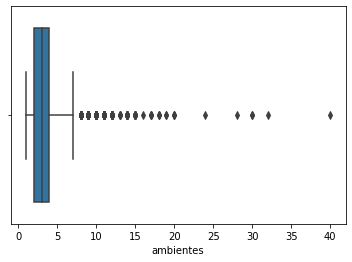

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.ambientes)

Analicemos los casos en los que la propiedad tenga más de 18 ambientes.

In [ ]:
columnas = ['ambientes', 'habitaciones', 'superficie_cubierta', 'tipo', 'latitud', 'longitud']
df_propiedades_atipicos.loc[df_propiedades_atipicos['ambientes'] > 15, columnas]

,ambientes,habitaciones,superficie_cubierta,tipo,latitud,longitud
21009,30.0,2.0,79.0,Departamento,-34.616391,-58.456038
32758,19.0,18.0,318.0,PH,-34.632698,-58.360514
52157,30.0,2.0,60.0,PH,-34.649872,-58.483012
90004,32.0,32.0,435.0,PH,-34.633236,-58.480313
90686,17.0,8.0,616.0,Casa,-34.590064,-58.395623
115403,17.0,17.0,598.0,PH,-34.598070,-58.444686
153687,17.0,14.0,836.0,PH,-34.597022,-58.385681
208593,18.0,17.0,323.0,PH,-34.629796,-58.363928
211468,20.0,1.0,31.0,Departamento,-34.618153,-58.362615
225809,16.0,12.0,580.0,Casa,-34.616239,-58.371198


(De estos registros, se puede destacar aquellos que tienen hasta 3 habitaciones. Siendo que siempre que esto pasa, los números son múltiplos de 10, se puede asumir que hubo un error de tipeo. Esto se puede solucionar de manera similar a lo hecho en la variable de superficie de las propiedades.)

In [ ]:
df_propiedades_atipicos.drop(df_propiedades_atipicos[df_propiedades_atipicos['ambientes'] > 15].index, inplace=True)

Además, ninguna propiedad puede tener más habitaciones que ambientes, por lo tanto se puede borrar esos registros por ser imprecisos:

In [ ]:
df_propiedades_atipicos = df_propiedades_atipicos.drop(df_propiedades_atipicos[df_propiedades_atipicos['habitaciones'] > df_propiedades_atipicos['ambientes']].index, axis='rows')

No se puede deducir nada que indique que los valores restantes son errores, ya que su cantidad de ambientes es razonable para la superficie cubierta.

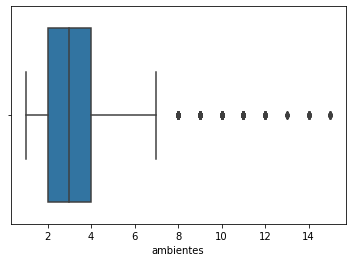

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.ambientes)

Ahora, podemos hacer lo mismo con la cantidad de habitaciones.

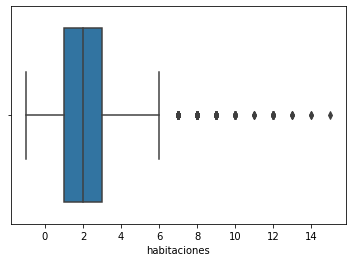

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.habitaciones)

Claramente hay un outlier en el rango de 70 habitaciones, lo cuál es absurdo dado que el mayor número de ambientes en el dataset es 32. Se puede eliminar.

In [ ]:
df_propiedades_atipicos.drop(df_propiedades_atipicos[df_propiedades_atipicos['habitaciones'] > 15].index, inplace=True)

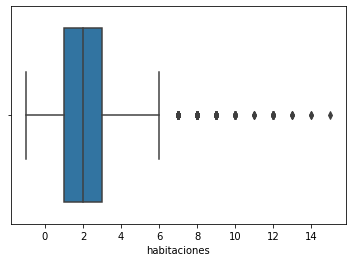

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.habitaciones)

## Precio

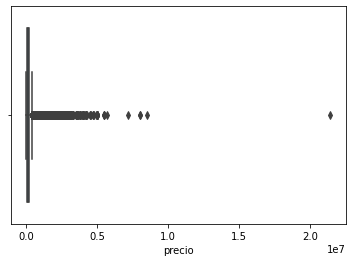

In [ ]:
grf = sns.boxplot(x=df_propiedades_atipicos.precio)

Podemos empezar una exploración inicial de estos valores empezando por los que sean mayores a 5 millones de dólares.

In [ ]:
columnas = ['ambientes', 'superficie_total', 'superficie_cubierta', 'tipo', 'precio', "latitud", "longitud"]
df_propiedades_atipicos.loc[df_propiedades_atipicos['precio'] > 1000000, columnas]

,ambientes,superficie_total,superficie_cubierta,tipo,precio,latitud,longitud
438,4.0,282.0,256.0,Departamento,2250000.0,-34.575053,-58.407958
448,5.0,304.0,294.0,Departamento,1200000.0,-34.577855,-58.408796
629,4.0,214.0,196.0,Departamento,1200000.0,-34.566536,-58.448246
816,7.0,295.0,295.0,Departamento,1250000.0,-34.588526,-58.384700
834,9.0,390.0,340.0,Departamento,1200000.0,-34.586193,-58.396815
...,...,...,...,...,...,...,...
459724,8.0,285.0,272.0,Departamento,1250000.0,-34.587991,-58.389017
459729,6.0,271.0,265.0,Departamento,1250000.0,-34.587588,-58.389527
459755,8.0,431.0,415.0,Departamento,2800000.0,-34.590653,-58.384325
459764,8.0,383.0,383.0,Departamento,1700000.0,-34.586441,-58.387889


In [ ]:
df_propiedades_atipicos[df_propiedades_atipicos['precio'] == 21400000]

,fecha_inicio,fecha_fin,latitud,longitud,barrio,tipo,ambientes,habitaciones,superficie_total,superficie_cubierta,precio
60073,2021-01-25,2022-05-13,-34.616044,-58.458621,Caballito,Departamento,3.0,2.0,68.0,64.0,21400000.0


De esto no podemos decir nada, excepto por la propiedad de 21 millones de dólares. Al ser un departamento con poca superficie total, podemos descartarlo.

In [ ]:
df_propiedades_atipicos.drop(df_propiedades_atipicos[df_propiedades_atipicos['precio'] == 21400000].index, axis='rows', inplace=True)

In [ ]:
df_propiedades = df_propiedades_atipicos
df_propiedades.to_csv('df_propiedades.csv', index=False)

# Dataset post-procesado

## Densidades

In [ ]:
df_propiedades = pd.read_csv('/content/df_propiedades.csv')

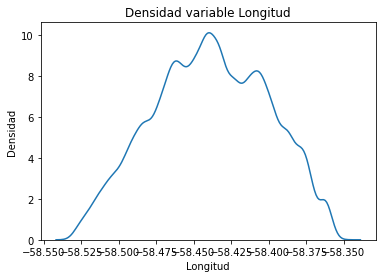

In [ ]:
plt.figure(figsize=(6, 4))
grf = sns.kdeplot(data=df_propiedades['longitud']).set(title="Densidad variable Longitud",xlabel="Longitud",ylabel="Densidad")

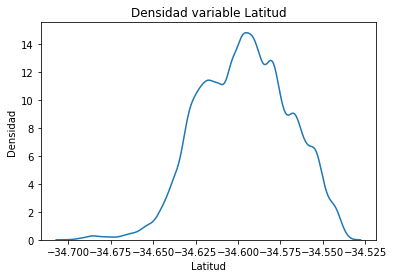

In [ ]:
plt.figure(figsize=(6, 4))
grf = sns.kdeplot(data=df_propiedades['latitud']).set(title="Densidad variable Latitud",xlabel="Latitud",ylabel="Densidad")

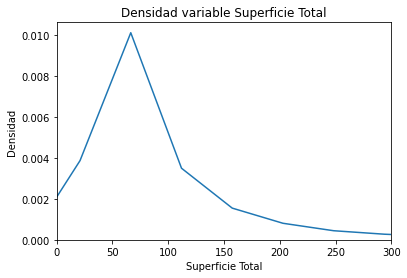

In [ ]:
plt.figure(figsize=(6, 4))
grf = sns.kdeplot(data=df_propiedades['superficie_total']).set(title="Densidad variable Superficie Total",xlabel="Superficie Total",ylabel="Densidad", xlim=(0, 300))

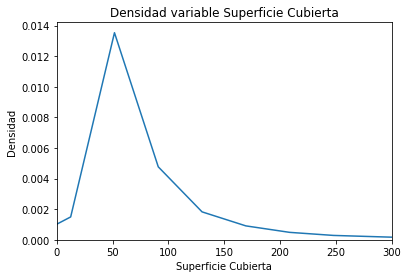

In [ ]:
plt.figure(figsize=(6, 4))
grf = sns.kdeplot(data=df_propiedades['superficie_cubierta']).set(title="Densidad variable Superficie Cubierta",xlabel="Superficie Cubierta",ylabel="Densidad", xlim=(0, 300))

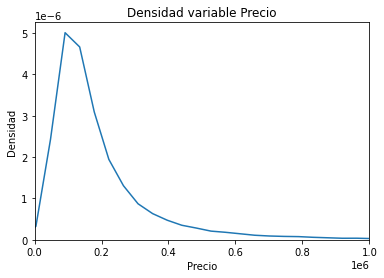

In [ ]:
plt.figure(figsize=(6, 4))
grf = sns.kdeplot(data=df_propiedades['precio']).set(title="Densidad variable Precio",xlabel="Precio",ylabel="Densidad", xlim=(0, 1000000))

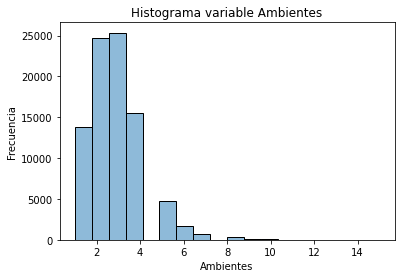

In [ ]:
plt.figure(figsize=(6, 4))
sns_hist=sns.histplot(data=df_propiedades['ambientes'], alpha = 0.5, bins=18).set(title="Histograma variable Ambientes",xlabel="Ambientes",ylabel="Frecuencia")
plt.show()

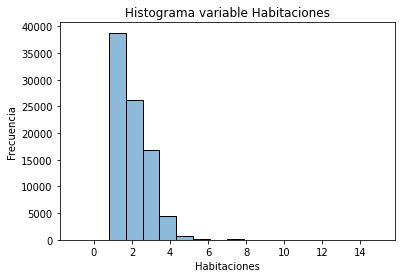

In [ ]:
plt.figure(figsize=(6, 4))
sns_hist=sns.histplot(data=df_propiedades['habitaciones'], alpha = 0.5, bins=18).set(title="Histograma variable Habitaciones",xlabel="Habitaciones",ylabel="Frecuencia")
plt.show()

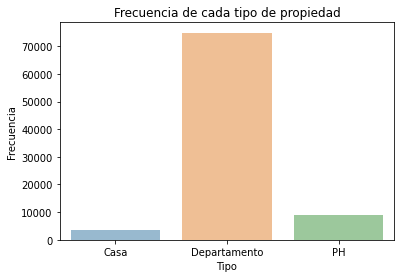

In [ ]:
df_agrupado_tipo = df_propiedades.groupby(['tipo']).count()

eje_x = df_agrupado_tipo.index.tolist()   ## Declaramos valores para el eje x
eje_y = df_agrupado_tipo['fecha_inicio'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=df_agrupado_tipo ,alpha=0.5).set(title="Frecuencia de cada tipo de propiedad",ylabel='Frecuencia',xlabel='Tipo')

## Correlatividad

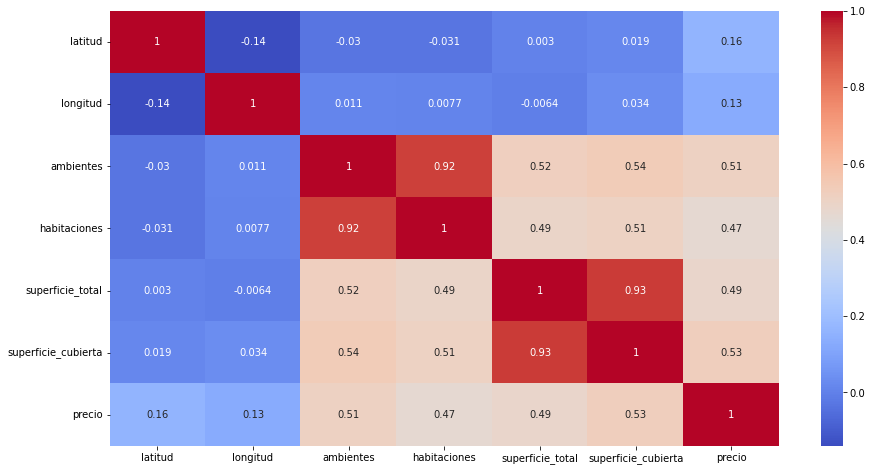

In [ ]:
plt.figure(figsize = (15,8))
grf_heatmap = sns.heatmap(df_propiedades.corr(), annot = True, cmap='coolwarm')

# Reducción de dimensionalidad


Para esta sección reduciremos la dimensionalidad del data set para variables que estén correlacionadas. Viendo la matriz de correlación podemos observar que la correlación entre las features 'ambientes', 'habitaciones', 'superficie_total', 'superficie_cubierta' y 'precio' es considerable, por lo que es una buena idea reducir la dimensión de estas columnas para comprimir el dataset y poder graficar los datos.

Para realizar esto, primero debemos normalizar estas columnas para luego poder aplicar algoritmos de reducción de dimensionalidad.

In [ ]:
df_propiedades = pd.read_csv('/content/sample_data/df_propiedades.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

columnas = ['ambientes', 'habitaciones', 'superficie_total', 'superficie_cubierta', 'precio']

x = df_propiedades.loc[:, columnas].to_numpy()
x = StandardScaler().fit_transform(x)
x

array([[ 0.13116295,  0.10231279, -0.30371262, -0.24819855, -0.47796921],
       [ 0.86265607,  1.08699586, -0.19630023, -0.08139505, -0.42166626],
       [ 0.86265607,  0.10231279,  0.28849137,  0.29669288, -0.25730364],
       ...,
       [-1.33182328, -0.88237027, -0.36636984, -0.52620438, -0.50384758],
       [-1.33182328, -0.88237027, -0.49168429, -0.51508415, -0.50734465],
       [-0.60033017, -0.88237027, -0.07098578,  0.07428821, -0.29577149]])

En primer lugar, podemos aplicar PCA y analizar los resultados:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=12)
x_transformada = pca.fit_transform(x)
pca_df_aux = pd.DataFrame(data = x_transformada, columns = ['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5'])

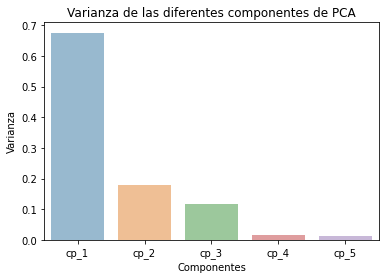

In [ ]:
df_varianzas = pd.DataFrame(data=pca.explained_variance_ratio_, index = ['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5'], columns=['varianza'])
eje_x = df_varianzas.index.tolist()
eje_y = df_varianzas['varianza'].tolist()

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=df_varianzas ,alpha=0.5).set(title="Varianza de las diferentes componentes de PCA",ylabel='Varianza',xlabel='Componentes')
plt.show()

La varianza de cada columna creada por PCA indica la información que retiene cada columna. Como se puede ver, la primer columna contiene la gran mayoria, seguido de las siguientes dos columnas. Las columnas 4 y 5 contienen muy poca información, lo que nos indica que se pueden eliminar.
Esto se puede verificar realizando un gráfico de cada eje (columna) resultante de la proyección que realiza PCA:

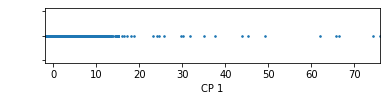

In [ ]:
plt.figure(figsize=(6, 1))
x = pca_df_aux["cp_1"]
y = np.zeros_like(x)

max_cp_1 = x.max()
min_cp_1 = x.min()

plt.scatter(x, y, s=10,marker='.')
plt.xlabel(r'CP 1')
plt.yticks(color='w')
plt.xlim(min_cp_1, max_cp_1)
plt.show()

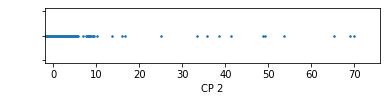

In [ ]:
plt.figure(figsize=(6, 1))
x = pca_df_aux["cp_2"]
y = np.zeros_like(x)

plt.scatter(x, y, s=10,marker='.')
plt.xlabel(r'CP 2')
plt.yticks(color='w')
plt.xlim(min_cp_1, max_cp_1)
plt.show()

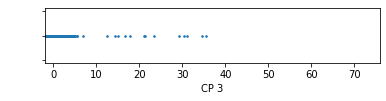

In [ ]:
plt.figure(figsize=(6, 1))
x = pca_df_aux["cp_3"]
y = np.zeros_like(x)

plt.scatter(x, y, s=10,marker='.')
plt.xlabel(r'CP 3')
plt.yticks(color='w')
plt.xlim(min_cp_1, max_cp_1)
plt.show()

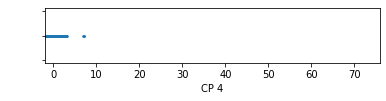

In [ ]:
plt.figure(figsize=(6, 1))
x = pca_df_aux["cp_4"]
y = np.zeros_like(x)

plt.scatter(x, y, s=10,marker='.')
plt.xlabel(r'CP 4')
plt.yticks(color='w')
plt.xlim(min_cp_1, max_cp_1)
plt.show()

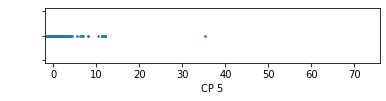

In [ ]:
plt.figure(figsize=(6, 1))
x = pca_df_aux["cp_5"]
y = np.zeros_like(x)

plt.scatter(x, y, s=10,marker='.')
plt.xlabel(r'CP 5')
plt.yticks(color='w')
plt.xlim(min_cp_1, max_cp_1)
plt.show()

En las últimas dos columnas se puede apreciar que la mayoría de las observaciones están más juntas, en comparación con las primeras tres.

## t-SNE

Si bien PCA es un buen método para reducir la dimensión del dataset, es posible que querramos visualizar los datos, cosa que no es fácil de hacer con tres dimensiones. Por lo tanto, el objetivo ahora es reducir el número de dimensiones de estas columnas de cinco a dos. Para ello podríamos usar PCA, pero al eliminar la tercer columna se perderá alrededor del 10% de la información. Por esta razón utilizaremos t-SNE para realizar la reducción, considerando que es el mejor método para visualización de datos gracias al esfuerzo que realiza para mantener las distancias y los clusters de la información.
El hiperparámetro que debemos ajustar ahora es el de **perplexity**, que se relaciona con la desviación de la campana de Gauss de cada punto, la cuál es utilizada para calcular la probabilidad de sus vecinos. A mayor valor, más abarcativo será el algoritmo. Por esta razón probamos con distintos valores hasta llegar a un valor que consiga un gráfico con clusters definidos, que sea fácil de visualizar.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, random_state=12)
x_tsne = tsne.fit_transform(x)

ValueError: ignored

In [ ]:
fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x = x_tsne[:,0], y = x_tsne[:,1], s=0.5)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=100, random_state=12)
x_tsne = tsne.fit_transform(x)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x = x_tsne[:,0], y = x_tsne[:,1], s=0.5)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

In [ ]:
tsne = TSNE(n_components=2, perplexity=200, random_state=12)
x_tsne = tsne.fit_transform(x)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x = x_tsne[:,0], y = x_tsne[:,1], s=0.5)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

Como se puede observar, el gráfico contiene cuatro clusters definidos, por lo que nos quedaremos con esta iteración.

In [ ]:
df_propiedades.drop(columns=columnas, inplace=True)

In [ ]:
df_tsne = pd.DataFrame(x_tsne, columns=["cp_1", "cp_2"])
df_propiedades_comprimido = df_propiedades.join(df_tsne)

In [ ]:
# Exportamos el dataframe
df_propiedades_comprimido.to_csv('df_propiedades_comprimido.csv', index=False)

# Agrupamiento

Antes de comenzar, podemos utilizar la estadística de Hopkins para ver de antemano la tendencia a clustering del dataset.

In [ ]:
df_propiedades = pd.read_csv('/content/df_propiedades.csv')
columnas = ["latitud", "longitud", "superficie_total", "superficie_cubierta", "ambientes", "habitaciones", "precio"]
df_propiedades_kmeans = df_propiedades[columnas]

In [ ]:
 score = hopkins(df_propiedades_kmeans, df_propiedades_kmeans.shape[0])
 print(f'Estadística de Hopkins: {score}')

Estadística de Hopkins: 0.00034183317760240576


El valor obtenido es muy bajo, lo que significa que el dataset no tiene mucha tendencia a poder dividirse en clusters. Sin embargo, podemos intentar calcular los clusters resultantes usando K-Means para 4 clusters. Esto es debido a que el gráfico obtenido con t-SNE en la sección anterior define esta cantidad de clusters.

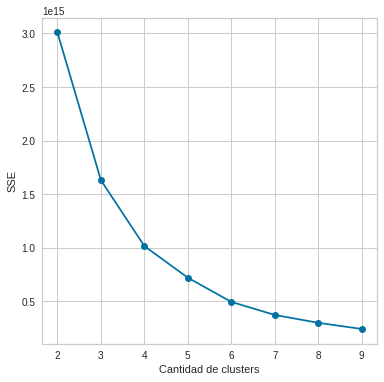

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=12)
    km.fit(df_propiedades_kmeans)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

La _incercia_ resultante de KMeans es una medida de que tan lejanos están los puntos de cada cluster con los demás puntos de su mismo cluster. Mientras menor sea esta métrica, mejor serán los  clusters. Sin embargo, al aumentar el número de clusters se pierde la representatividad de cada cluster. En el gráfico anterior no se puede ver claramente un número que actúe como 'codo', pero se puede ver que 4 es un buen número de clusters, dado que los valores anteriores tienen mucha inercia, y los valores posteriores pierden inercia pero a una tasa mucho menor. 

Como siguiente paso, calcularemos el score de silhouette, que nos dará una métrica de que tan definidos son los clusters elegidos:

In [ ]:
km = KMeans(n_clusters=4, random_state=12)
clusters = km.fit_predict(df_propiedades_kmeans)

In [ ]:
score = silhouette_score(df_propiedades_kmeans, clusters)
print(f"Silhouette score: {score}")

Silhouette score: 0.7026572325935903


También se puede realizar un gráfico, para ver como se comparan los valores de silhouette entre los diferentes clusters. 

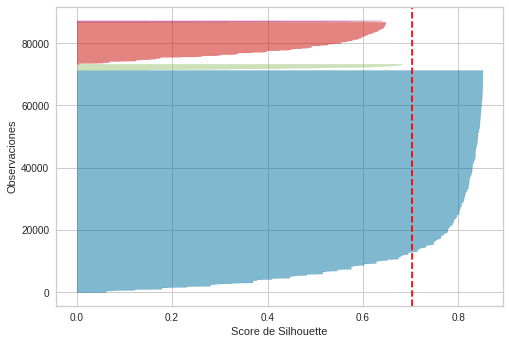

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', random_state=12)    # Instancio el visualizador
visualizer.fit(df_propiedades_kmeans)
plt.xlabel("Score de Silhouette")
plt.ylabel("Observaciones")
plt.show()

El resultado es un cluster que está muy bien definido acorde al score que recibe, y tres clusters que están completamente debajo del score de Silhouette promedio del dataset, por lo que su calidad será mucho menor. Esto tiene sentido, debido al análisis de la estadística de Hopkins realizada anteriormente.

Por último, podemos ver los centros de cada cluster para conocer los valores más representativos de cada uno.

In [ ]:
centros = pd.DataFrame(km.cluster_centers_, columns=columnas)
centros.precio = centros.precio.astype('int64')
centros

,latitud,longitud,superficie_total,superficie_cubierta,ambientes,habitaciones,precio
0,-34.598299,-58.441067,69.581248,58.332690,2.483901,1.648841,135268
1,-34.582897,-58.412298,295.434294,256.950757,5.098098,3.392392,1200072
2,-34.587882,-58.432150,168.725372,140.996659,4.163527,2.922427,434131
3,-34.581279,-58.406333,438.093382,388.719363,5.934091,3.738636,2861723


Podemos observar a partir de estos valores, que el primer cluster se compone de propiedades de bajo precio, con poca superficie y pocos ambientes. El segundo cluster tiene una mayor cantidad de habitaciones, y tiene una superficie mucho mayor. Además tiene un precio promedio casi diez veces mayor que el primer cluster.
El tercer cluster, en cambio, es un tipo de propiedad que se encuentra entre el tercer y primer cluster. Por último, el cluster 4 tiene un precio mucho mayor, y la mayor superficie.

## KMeans con 3 grupos

Podemos realizar el mismo análisis con 3 clusters:

In [ ]:
km_3 = KMeans(n_clusters=3, random_state=12)
clusters_3 = km_3.fit_predict(df_propiedades_kmeans)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


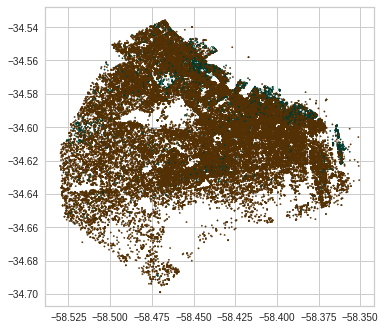

In [ ]:
df_propiedades_kmeans.loc[:, "grupo"] = clusters_3
gdf = geopandas.GeoDataFrame(df_propiedades_kmeans, geometry=geopandas.points_from_xy(df_propiedades_kmeans['longitud'], df_propiedades_kmeans['latitud']))
gdf.plot(column="grupo", cmap='BrBG', markersize=2)
plt.show()

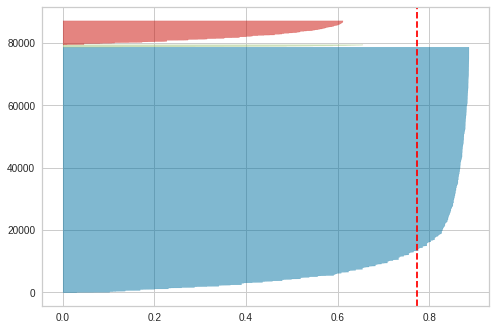

In [ ]:
km = KMeans(n_clusters=3, random_state=12)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick', random_state=12)    # Instancio el visualizador
visualizer.fit(df_propiedades_kmeans)
plt.show()

# Clasificación

In [ ]:
df_propiedades_clasificacion = pd.read_csv('/content/df_propiedades.csv')

In [ ]:
df_propiedades_clasificacion["precio_por_m2"] = df_propiedades_clasificacion["precio"] // df_propiedades_clasificacion["superficie_total"]

labels = ["bajo", "medio", "alto"]

## Distribución de precio por metro cuadrado

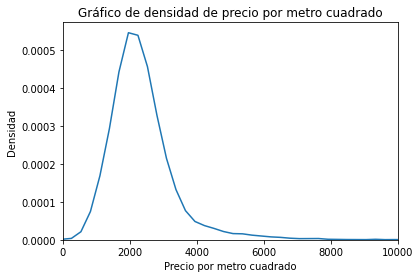

In [ ]:
grf_precio_por_m2 = sns.kdeplot(data=df_propiedades_clasificacion['precio_por_m2']).set(title="Gráfico de densidad de precio por metro cuadrado",xlabel="Precio por metro cuadrado",ylabel="Densidad", xlim=(0, 10000))

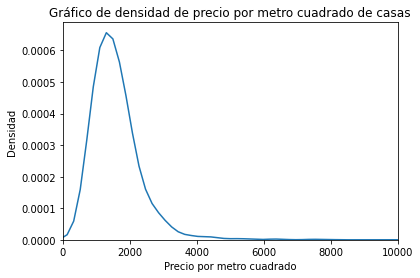

In [ ]:
grf_precio_por_m2_casas = sns.kdeplot(data=df_propiedades_clasificacion.loc[df_propiedades_clasificacion["tipo"] == "Casa", 'precio_por_m2']).set(title="Gráfico de densidad de precio por metro cuadrado de casas",xlabel="Precio por metro cuadrado",ylabel="Densidad", xlim=(0, 10000))

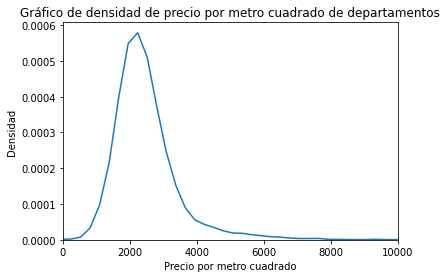

In [ ]:
grf_precio_por_m2_departamentos = sns.kdeplot(data=df_propiedades_clasificacion.loc[df_propiedades_clasificacion["tipo"] == "Departamento", 'precio_por_m2']).set(title="Gráfico de densidad de precio por metro cuadrado de departamentos",xlabel="Precio por metro cuadrado",ylabel="Densidad", xlim=(0, 10000))

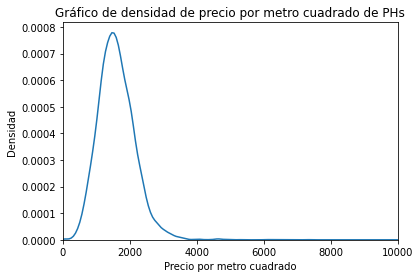

In [ ]:
grf_precio_por_m2_phs = sns.kdeplot(data=df_propiedades_clasificacion.loc[df_propiedades_clasificacion["tipo"] == "PH", 'precio_por_m2']).set(title="Gráfico de densidad de precio por metro cuadrado de PHs",xlabel="Precio por metro cuadrado",ylabel="Densidad", xlim=(0, 10000))

## Primer alternativa

In [ ]:
df_propiedades_primer_alternativa = df_propiedades_clasificacion.copy()
df_propiedades_primer_alternativa["tipo_precio"] = pd.qcut(df_propiedades_primer_alternativa["precio_por_m2"], q=3, labels=labels)

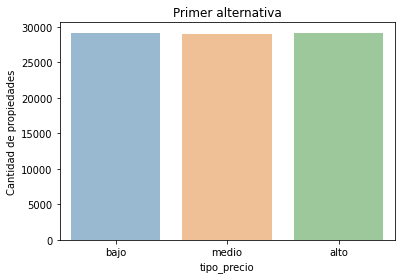

In [ ]:
df_agrupado_tipo_precio = df_propiedades_primer_alternativa.groupby(['tipo_precio']).count()

eje_x = df_agrupado_tipo_precio.index.tolist()   ## Declaramos valores para el eje x
eje_y = df_agrupado_tipo_precio['fecha_inicio'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=df_agrupado_tipo_precio ,alpha=0.5).set(title="Primer alternativa",ylabel='Cantidad de propiedades',xlabel='tipo_precio')
plt.show()

## Segunda alternativa

In [ ]:
df_propiedades_segunda_alternativa = df_propiedades_clasificacion.copy()
df_propiedades_segunda_alternativa["tipo_precio"] = pd.qcut(df_propiedades_segunda_alternativa["precio_por_m2"],q=[0,0.25,0.75,1], labels=labels)

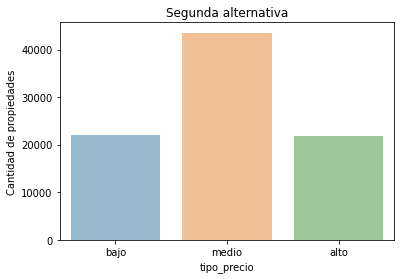

In [ ]:
df_agrupado_tipo_precio = df_propiedades_segunda_alternativa.groupby(['tipo_precio']).count()

eje_x = df_agrupado_tipo_precio.index.tolist()   ## Declaramos valores para el eje x
eje_y = df_agrupado_tipo_precio['fecha_inicio'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=df_agrupado_tipo_precio ,alpha=0.5).set(title="Segunda alternativa",ylabel='Cantidad de propiedades',xlabel='tipo_precio')
plt.show()

## Tercer alternativa

In [ ]:
df_propiedades_tercer_alternativa = df_propiedades_clasificacion.copy()

In [ ]:
df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "Casa", "tipo_precio"] = pd.qcut(df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "Casa", "precio_por_m2"], q=[0,0.25,0.75,1], labels=labels)
df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "Departamento", "tipo_precio"] = pd.qcut(df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "Departamento", "precio_por_m2"], q=[0,0.25,0.75,1], labels=labels)
df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "PH", "tipo_precio"] = pd.qcut(df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "PH", "precio_por_m2"], q=[0,0.25,0.75,1], labels=labels)

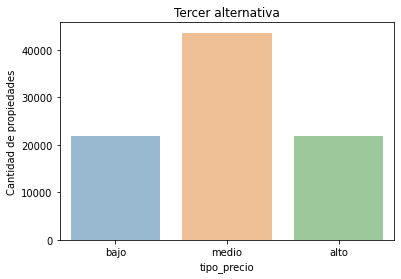

In [ ]:
df_agrupado_tipo_precio = df_propiedades_tercer_alternativa.groupby(['tipo_precio']).count()

eje_x = df_agrupado_tipo_precio.index.tolist()   ## Declaramos valores para el eje x
eje_y = df_agrupado_tipo_precio['fecha_inicio'].tolist()  ## Declaramos valores para el eje y

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=df_agrupado_tipo_precio ,alpha=0.5).set(title="Tercer alternativa",ylabel='Cantidad de propiedades',xlabel='tipo_precio')
plt.show()

In [ ]:
df_propiedades_primer_alternativa.loc[df_propiedades_primer_alternativa["tipo"] == "Casa", "tipo_precio"].value_counts()

bajo     2603
medio     546
alto      293
Name: tipo_precio, dtype: int64

In [ ]:
df_propiedades_segunda_alternativa.loc[df_propiedades_segunda_alternativa["tipo"] == "Casa", "tipo_precio"].value_counts()

bajo     2329
medio     896
alto      217
Name: tipo_precio, dtype: int64

In [ ]:
df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "Casa", "tipo_precio"].value_counts()

medio    1720
bajo      863
alto      859
Name: tipo_precio, dtype: int64

In [ ]:
df_propiedades_primer_alternativa.loc[df_propiedades_primer_alternativa["tipo"] == "Departamento", "tipo_precio"].value_counts()

alto     28362
medio    26578
bajo     19941
Name: tipo_precio, dtype: int64

In [ ]:
df_propiedades_segunda_alternativa.loc[df_propiedades_segunda_alternativa["tipo"] == "Departamento", "tipo_precio"].value_counts()

medio    39671
alto     21314
bajo     13896
Name: tipo_precio, dtype: int64

In [ ]:
df_propiedades_tercer_alternativa.loc[df_propiedades_tercer_alternativa["tipo"] == "PH", "tipo_precio"].value_counts()

medio    4465
bajo     2244
alto     2231
Name: tipo_precio, dtype: int64

## Decisión

Justificación:

 - Tiene sentido que las casas sean caras

In [ ]:
df_propiedades_clasificacion = df_propiedades_primer_alternativa.copy()

## Predicción

In [ ]:
df_propiedades_clasificacion_modelos = df_propiedades_clasificacion.copy()
df_propiedades_clasificacion_modelos.drop(columns=['precio', 'precio_por_m2'], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

#Creo un dataset con los features que voy a usar para clasificar
df_propiedades_x = df_propiedades_clasificacion_modelos.drop(columns=['tipo_precio'], inplace=False)

#Creo un dataset con la variable target
df_propiedades_y = df_propiedades_clasificacion_modelos['tipo_precio'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(df_propiedades_x,
                                                    df_propiedades_y, 
                                                    test_size=0.2,
                                                    random_state=12)

#Genero los conjuntos de train y de test para el dataset de dimensión reducida
x_train_rd, x_test_rd, y_train_rd, y_test_rd = train_test_split(df_propiedades_x,
                                                    df_propiedades_y, 
                                                    test_size=0.2,
                                                    random_state=12)

## Modelo 1: Árbol de decisión

### Feature engineering

In [ ]:
columnas_para_dummies = ["tipo", "barrio"]
columnas_a_eliminar = ["fecha_inicio", "fecha_fin"]
x_train_arbol = pd.get_dummies(x_train, columns = columnas_para_dummies, drop_first=True)
x_test_arbol = pd.get_dummies(x_test, columns = columnas_para_dummies, drop_first=True)
x_train_arbol.drop(columns = columnas_a_eliminar, inplace=True)
x_test_arbol.drop(columns = columnas_a_eliminar, inplace=True)

### Modelo

Elegimos recall porque nos interesa predecir correctamente la mayor cantidad de propiedades. En este caso, nos interesa la predicción a nivel global, sin priorizar ninguna categoría por sobre otra. Por lo tanto, elegimos el parámetro 'micro' para nuestro scorer.

[Documentación Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score
from sklearn import tree
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
import sklearn as sk

In [ ]:
arbolcv=tree.DecisionTreeClassifier()

n = 20

params_grid = {'criterion':['gini','entropy'],
               'ccp_alpha':np.linspace(0.001,0.05,n), 
               'max_depth':list(range(14,20))}

scorer = make_scorer(sk.metrics.recall_score, average = 'micro')

kfoldcv = StratifiedKFold(n_splits=20)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator = arbolcv,
                              param_distributions = params_grid,
                              scoring = scorer,
                              cv = kfoldcv,
                              n_iter = n,
                              random_state = 12) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train_arbol,y_train);

In [ ]:
randomcv.best_params_

{'max_depth': 19, 'criterion': 'entropy', 'ccp_alpha': 0.001}

In [ ]:
#Creo árbol con los mejores hiperparámetros 
arbolcv=tree.DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Hago CV
resultados = cross_validate(estimator = arbolcv,
                            X = x_train_arbol,
                            y = y_train,
                            cv = kfoldcv,
                            scoring = scorer,
                            return_estimator=True)
#Selecciono el arbol con mejor performance
metricsCV = resultados['test_score']
mejor_arbol = resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]


In [ ]:
score_train = max(resultados['test_score'])

0.6263610315186247

In [ ]:
model = mejor_arbol.fit(X = x_train_arbol, y = y_train)
y_pred = model.predict(x_test_arbol)

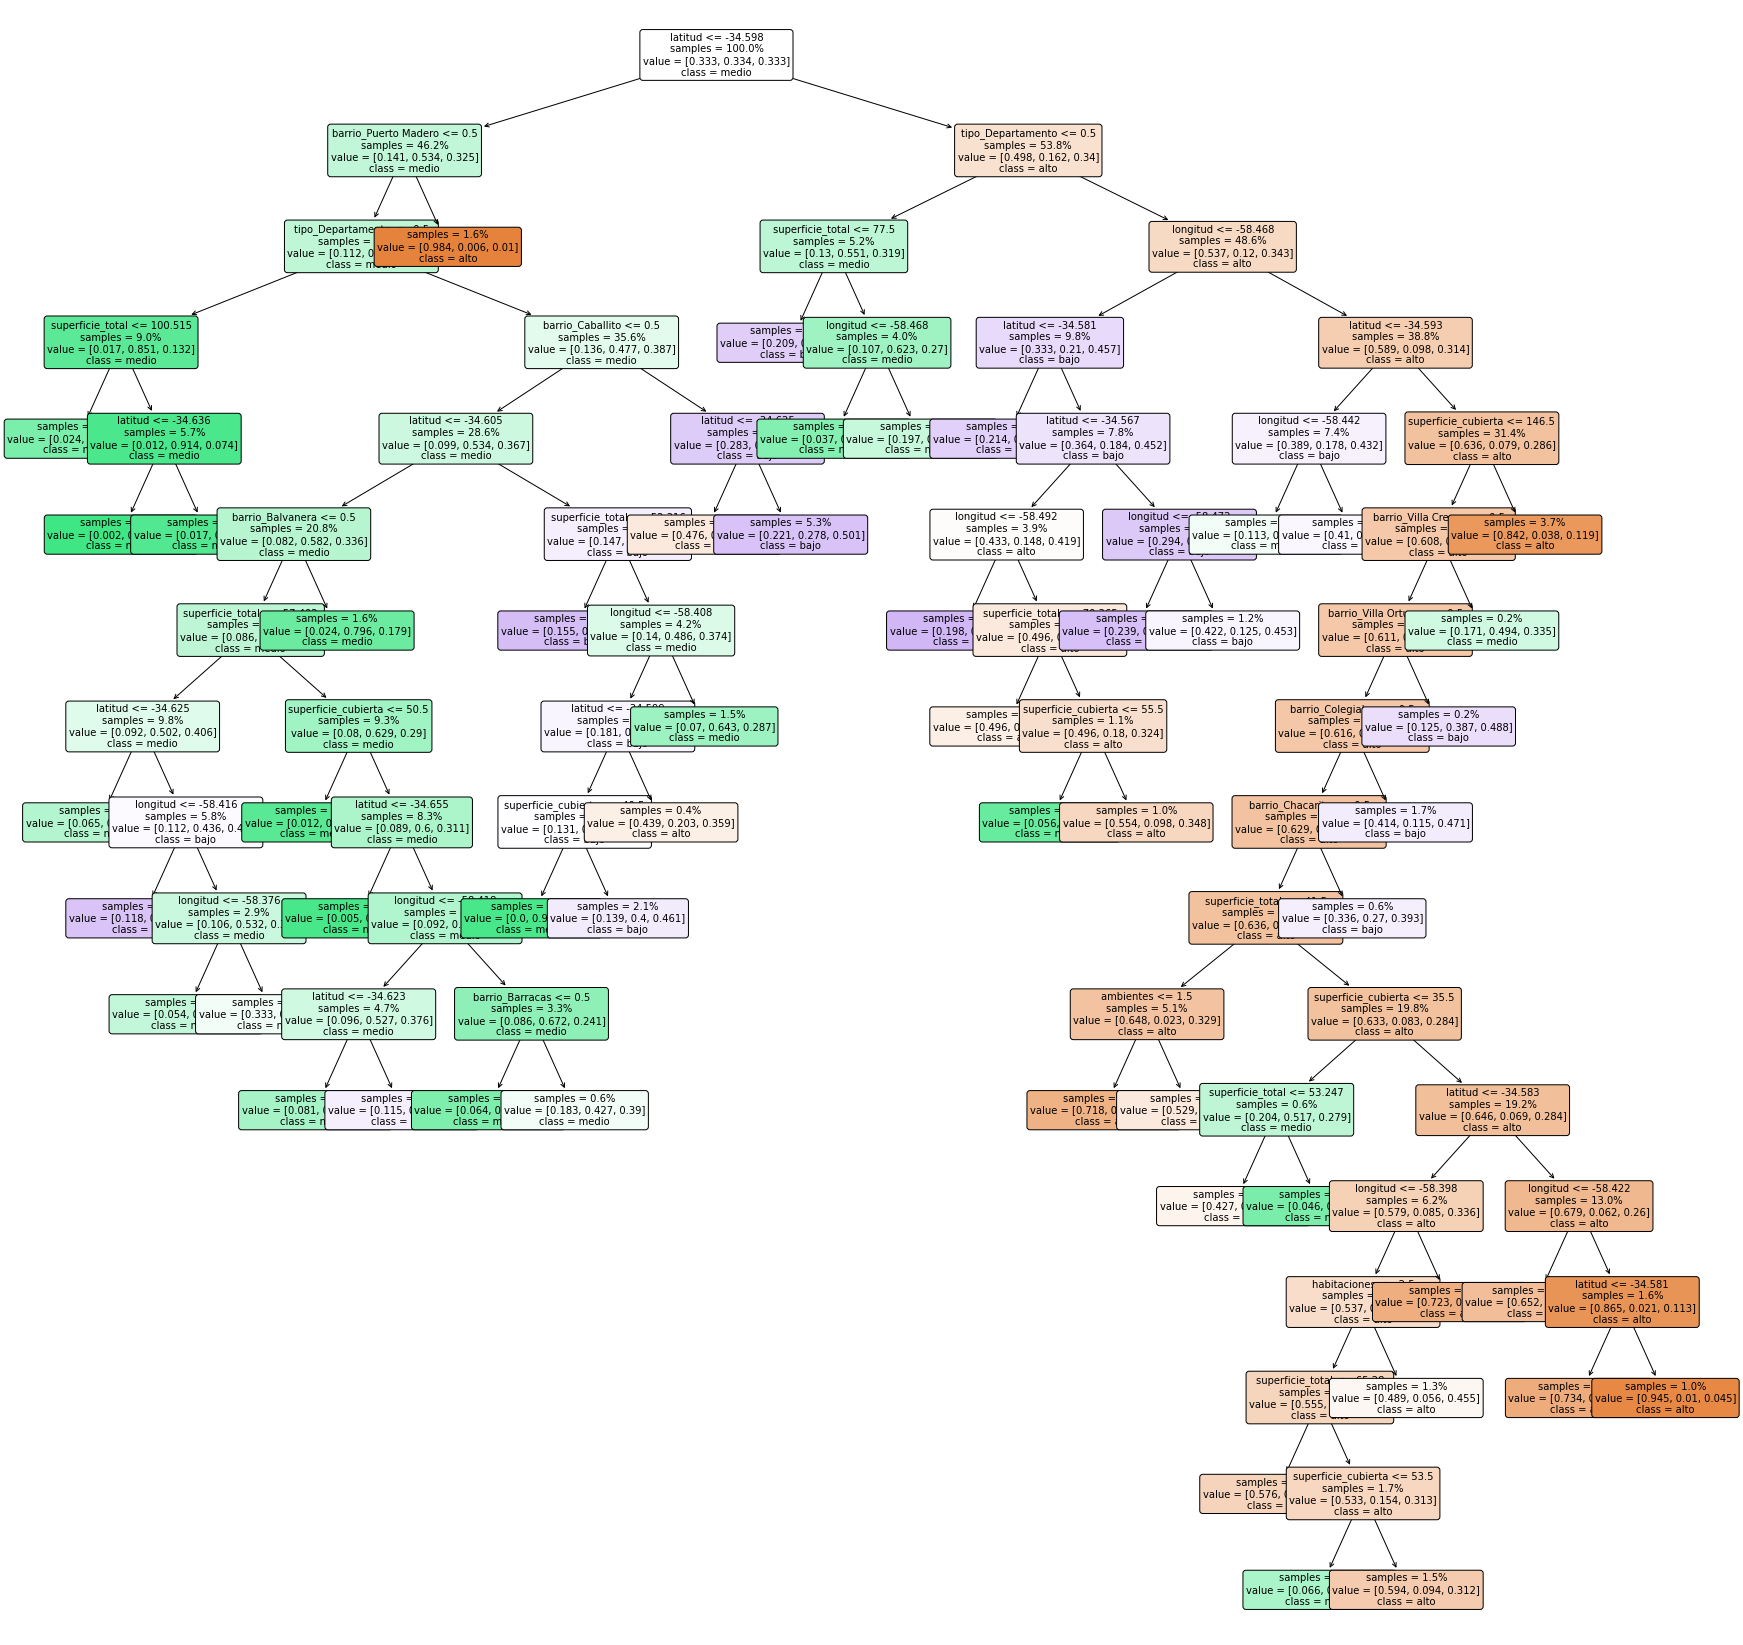

In [ ]:
plt.figure(figsize=(30,30))

tree_plot=tree.plot_tree(model,
                         max_depth=20,
                         feature_names=x_train_arbol.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=["alto", "medio", "bajo"],
                         proportion = True,
                         fontsize = 10,
                         impurity = False)

plt.show(tree_plot)

Como primer decisión, el árbol resultante divide las observaciones según latitud. Es decir, entre norte y sur, debido a que la ubicación geogáfica de cada propiedad afecta su precio.

En el caso en el que la propiedad se encuentre en la parte sur de la ciudad, el árbol pasa a evaluar si esta está en Puerto Madero. En el caso de que sí lo esté, inmediatamente clasifica a la propiedad como de precio alto.

Por otro lado, si la propiedad está del lado norte, pasa a preguntar si es de tipo departamento. El tipo de propiedad afecta el precio considerablemente por lo visto en el análisis hecho previamente de sus cuartiles. 

In [ ]:
columnas = x_train_arbol.columns.to_list()
df_importancia_features = pd.Series(mejor_arbol.feature_importances_, index = columnas)

In [ ]:
df_importancia_features_aux = df_importancia_features[df_importancia_features > 0]

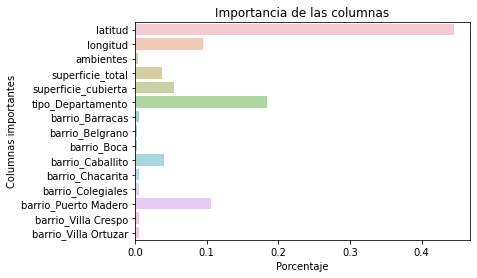

In [ ]:
eje_y = df_importancia_features_aux.index.tolist()
eje_x = df_importancia_features_aux.tolist()

sns_bar_plot=sns.barplot(x=eje_x, y=eje_y ,alpha=0.5, orient="h").set(title="Importancia de las columnas",xlabel='Porcentaje',ylabel='Columnas importantes')

El gráfico superior es consecuente con el análisis del árbol realizado previamente, ya que la primera decisión que toma es en base a la columna más importante. En general, las columnas que más afectan el árbol de decisión son aquellas relacionadas con la ubicación geográfica de la propiedad.

### Evaluación

Text(33.0, 0.5, 'True')

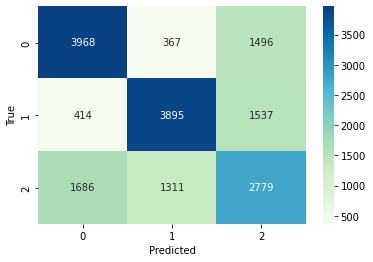

In [ ]:
#Creo la matriz de confusión
tabla = confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Al observar la matriz de confusión, podemos apreciar que la diagonal concentra la mayor cantidad de propiedades. Esto nos lleva a pensar que el modelo predice de manera aceptable. Debajo podemos rectificar con el recall score:

In [ ]:
recall=recall_score(y_test, y_pred, average='micro')
print(f"Recall del dataset de evaluación: {round(recall, 4)}")
print(f"Recall obtenido luego de entrenar el modelo: {round(score_train, 4)}")

Recall del dataset de evaluación: 0.6098
Recall obtenido luego de entrenar el modelo: 0.6264


Los valores obtenidos de recall score son parecidos, lo que sugiere que el modelo está ajustandose bien (no hay underfitting, ni overfitting).

### Modelo con reducción de dimensionalidad

#### Feature engineering

In [ ]:
columnas_para_dummies = ["tipo", "barrio"]
columnas_a_eliminar = ["fecha_inicio", "fecha_fin"]
x_train_arbol = pd.get_dummies(x_train, columns = columnas_para_dummies, drop_first=True)
x_test_arbol = pd.get_dummies(x_test, columns = columnas_para_dummies, drop_first=True)
x_train_arbol.drop(columns = columnas_a_eliminar, inplace=True)
x_test_arbol.drop(columns = columnas_a_eliminar, inplace=True)